**Objetivo**
**O objetivo dos Dados de Crédito Alemães é minimizar as chances de emitir empréstimos arriscados aos solicitantes, maximizando as chances de lucrar com bons empréstimos. Os perfis demográficos e socioeconómicos de um requerente são considerados pelos gestores de crédito antes de ser tomada uma decisão sobre o seu pedido de empréstimo.**

**O conjunto de dados German Credit é um conjunto de dados disponível publicamente baixado do UCI Machine Learning Repository. Os dados de crédito alemães contêm dados sobre 10 variáveis ​​e a classificação se um solicitante é considerado um risco de crédito Bom ou Ruim para 1.000 solicitantes de empréstimo. A tarefa requer explorar os dados e construir um modelo preditivo para fornecer orientação ao gerente do banco para tomar uma decisão sobre a aprovação de um empréstimo a um candidato em potencial com base em seu perfil.**



Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)




**A finalidade é maximizar o Risco "Bom" dos clientes.**

# **Importando e Analisando os Dados**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

%matplotlib inline

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module", "FutureWarning", "UndefinedMetricWarning", , "module" or "once", "UserWarning"
from warnings import simplefilter 
simplefilter(action='ignore', category=DeprecationWarning)

In [ ]:
conda install -c mndrake xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\fabio\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB
    conda-22.11.1              |   py39haa95532_4         892 KB
    libxgboost-1.5.0           |       hd77b12b_2         1.3 MB
    py-xgboost-1.5.0           |   py39haa95532_2         156 KB
    ruamel.yaml-0.17.21        |   py39h2bbff1b_0         174 KB
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    xgboost-1.5.0              |   py39haa95532_2          15 KB
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/win-64::_py-xgboost-mutex-2.0-cpu_0 None

In [ ]:
df = pd.read_csv("C://Users//fabio//OneDrive//Documentos//GitHub//Machine-Learning---Rede-Neural//15-German Credit//german_credit_data.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


**Excluindo a coluna de index extra:**

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

**Verificando se há dados nulos:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

**Verificando se há dados duplicados:**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


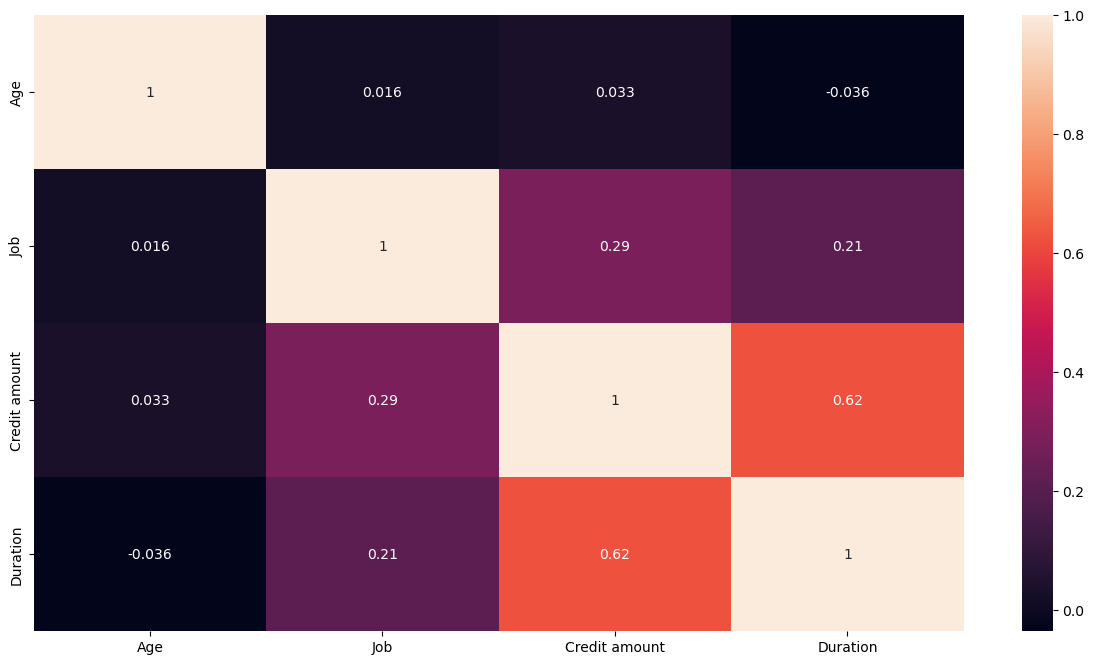

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True);

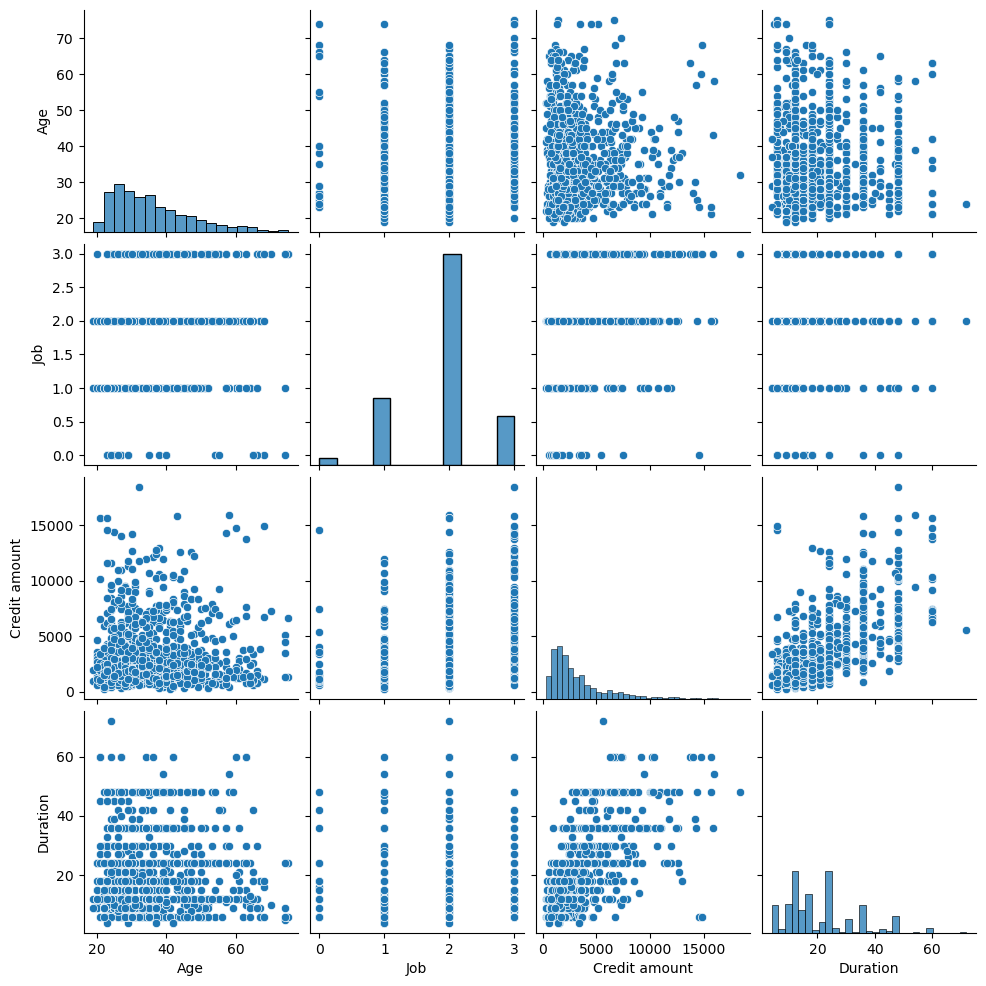

In [ ]:
sns.pairplot(df);

**Transformando os valores do Target para numéricos:**

In [ ]:
df['Risk'] = df['Risk'].map({'bad':0, 'good':1})

# **KNN Classifier**

**Transformando os valores do Target para numéricos:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Separando o que é features e target:
X = df.drop(columns=["Risk"])
y = df["Risk"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)


# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas.
pipe_features_num = Pipeline([("std", StandardScaler())])

# Pegando só as features numéricas
features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================
#Vamos tratar as features categóricas.
pipe_features_ohe = Pipeline([("onehot", OneHotEncoder(handle_unknown = "ignore"))]) # Dados Binários

features_ohe = ["Sex"]

pipe_features_oe = Pipeline([("input_cat_oe", SimpleImputer(strategy="constant", fill_value="unknown")),
                             ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

features_oe = ["Housing", "Saving accounts", "Checking account", "Purpose"]
# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat_ohe", pipe_features_ohe, features_ohe),
                                     ("transf_cat_oe", pipe_features_oe, features_oe)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o KNN para classificação.
pipe_knn = Pipeline([("pre_processador", pre_processador),
                      ("knn", KNeighborsClassifier())])


# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)


metrica1 = make_scorer(recall_score, pos_label=1)
metrica2 = make_scorer(precision_score, pos_label=0)


#Montando a grade de parâmetros do estimador (XGBoost)
param_grid_knn = {"knn__weights" : ["uniform", "distance"],
                 "knn__metric" : ["manhattan", "euclidean"],
                 "knn__n_neighbors" : range(2, 21)}


#Motando a grade geral de parâmetros.
model_knn = GridSearchCV(estimator=pipe_knn,
                       param_grid=param_grid_knn ,
                       scoring={"recall": metrica1, "precision" : metrica2}, 
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1,
                       refit="recall")

model_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                                                                          'Duration']),
                                                                        ('transf_cat_ohe',
                                                            

In [ ]:
model_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 19, 'knn__weights': 'uniform'}

In [ ]:
model_knn_results = pd.DataFrame(model_knn.cv_results_)
model_knn_results.sort_values(by=["rank_test_precision"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_recall,split1_test_recall,...,split3_test_precision,split4_test_precision,split5_test_precision,split6_test_precision,split7_test_precision,split8_test_precision,split9_test_precision,mean_test_precision,std_test_precision,rank_test_precision
36,0.026666,0.001287,0.028339,0.005168,manhattan,20,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.892857,0.839286,...,0.615385,0.555556,0.705882,0.562500,0.750000,0.500000,0.615385,0.590211,0.083305,1
35,0.026236,0.001794,0.021966,0.001481,manhattan,19,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.892857,0.892857,...,0.533333,0.285714,0.733333,0.562500,0.600000,0.500000,0.500000,0.570589,0.126210,2
53,0.030634,0.004762,0.021451,0.002786,euclidean,9,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.803571,0.910714,...,0.466667,0.500000,0.705882,0.650000,0.600000,0.352941,0.642857,0.568101,0.133349,3
37,0.027333,0.002186,0.020279,0.001756,manhattan,20,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.875000,0.875000,...,0.500000,0.333333,0.800000,0.562500,0.600000,0.428571,0.555556,0.567996,0.133655,4
68,0.027711,0.003898,0.030049,0.005292,euclidean,17,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.839286,0.875000,...,0.500000,0.500000,0.764706,0.615385,0.666667,0.400000,0.777778,0.567751,0.133358,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.026126,0.001688,0.031346,0.006043,euclidean,4,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.696429,0.785714,...,0.307692,0.285714,0.516129,0.483871,0.625000,0.370370,0.428571,0.451747,0.121237,72
39,0.026728,0.001664,0.018579,0.001714,euclidean,2,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.785714,0.875000,...,0.448276,0.350000,0.440000,0.413793,0.571429,0.409091,0.200000,0.442783,0.118201,73
1,0.029873,0.003583,0.019629,0.002083,manhattan,2,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.750000,0.821429,...,0.354839,0.272727,0.440000,0.444444,0.812500,0.333333,0.214286,0.430691,0.159681,74
38,0.025967,0.001737,0.025423,0.002844,euclidean,2,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.625000,0.696429,...,0.333333,0.428571,0.384615,0.428571,0.518519,0.424242,0.375000,0.426879,0.052353,75



Métricas de avaliação de treino:
[[ 92 178]
 [ 54 576]]


C:\Users\fabio\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


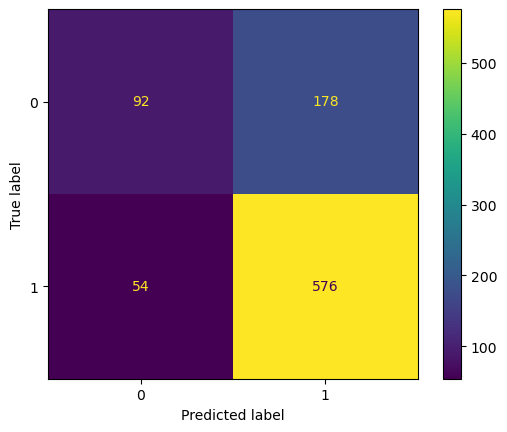

              precision    recall  f1-score   support

           0       0.63      0.34      0.44       270
           1       0.76      0.91      0.83       630

    accuracy                           0.74       900
   macro avg       0.70      0.63      0.64       900
weighted avg       0.72      0.74      0.72       900


Métricas de avaliação de teste:
[[12 18]
 [ 5 65]]


C:\Users\fabio\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


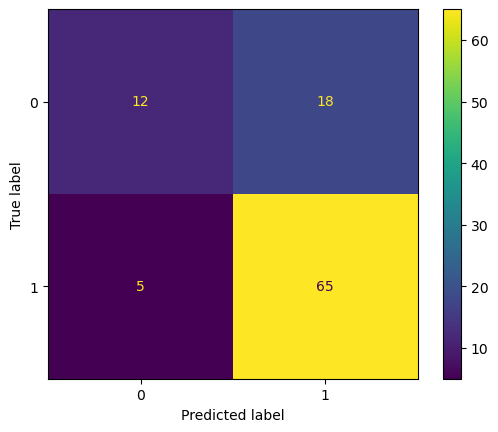

              precision    recall  f1-score   support

           0       0.71      0.40      0.51        30
           1       0.78      0.93      0.85        70

    accuracy                           0.77       100
   macro avg       0.74      0.66      0.68       100
weighted avg       0.76      0.77      0.75       100



In [ ]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = model_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = model_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

**Probabilidade de sair cada diagnóstico:**

In [ ]:
probas = model_knn.predict_proba(X_test)

In [ ]:
tabela_knn_ob = pd.DataFrame()

In [ ]:
tabela_knn_ob["Amostra existente"] = y_test

In [ ]:
tabela_knn_ob["Predição"] = y_pred_test

In [ ]:
tabela_knn_ob

,Amostra existente,Predição
763,0,1
173,1,1
422,1,1
695,1,1
358,1,1
...,...,...
157,1,1
206,1,1
452,1,1
789,0,0


Salvando a tabela

In [ ]:
tabela_knn_ob.to_csv("15-german_credit_knn_ob.csv")

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,0


Salvando o estimador...

In [ ]:
import pickle

In [ ]:
with open("15-credit_knn.pkl", "wb") as f:
    pickle.dump(model_knn, f)

In [ ]:
with open("15-credit_knn.pkl", "rb") as f:
    
    credit_knn = pickle.load(f)

# **XGBOOST CLASSIFIER**

In [ ]:
#Separando o que é features e target:
X = df.drop(columns=["Risk"])
y = df["Risk"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12, stratify=y)


# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas.
pipe_features_num = Pipeline([("std", StandardScaler())])

# Pegando só as features numéricas
features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================
#Vamos tratar as features categóricas.
pipe_features_ohe = Pipeline([("onehot", OneHotEncoder(handle_unknown = "ignore"))])

features_ohe = ["Sex"]

pipe_features_oe = Pipeline([("input_cat_oe", SimpleImputer(strategy="constant", fill_value="unknown")),
                             ("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

features_oe = ["Housing", "Saving accounts", "Checking account", "Purpose"]
# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat_ohe", pipe_features_ohe, features_ohe),
                                     ("transf_cat_oe", pipe_features_oe, features_oe)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o XGBoost para regressão.
pipe_xgbr = Pipeline([("pre_processador", pre_processador),
                      ("pca", PCA(n_components=2)),
                      ("xgbr", XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False))])


# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

#Montando a grade de parâmetros do estimador (XGBoost)
params_grid_xgbr = {"xgbr__n_estimators": [2000, 5000],
                   "xgbr__max_depth": [1, 2, 8, 10],
                   "xgbr__learning_rate": [0.001, 0.0001],
                   "xgbr__colsample_bytree": [0.2],
                   "xgbr__subsample": [0.8]}

#Motando a grade geral de parâmetros.
publicidade_xgbc = GridSearchCV(estimator=pipe_xgbr,
                       param_grid=params_grid_xgbr,
                       scoring="accuracy",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

publicidade_xgbc.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\fabio\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Job',
                                                                          'Credit '
                                                                          'amount',
                                                                          'Duration']),
                                                                        ('transf_cat_ohe',
                                                            

In [ ]:
publicidade_xgbc.best_params_

{'xgbr__colsample_bytree': 0.2,
 'xgbr__learning_rate': 0.001,
 'xgbr__max_depth': 1,
 'xgbr__n_estimators': 2000,
 'xgbr__subsample': 0.8}

In [ ]:
grid_xgbr_results = pd.DataFrame(publicidade_xgbc.cv_results_)
grid_xgbr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbr__colsample_bytree,param_xgbr__learning_rate,param_xgbr__max_depth,param_xgbr__n_estimators,param_xgbr__subsample,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.048044,0.279851,0.021388,0.005876,0.2,0.001,1,2000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.700000,0.700000,0.700000,0.722222,0.700000,0.700000,0.711111,0.704444,0.007370,1
1,8.088725,0.267196,0.019799,0.007321,0.2,0.001,1,5000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.722222,0.700000,0.711111,0.733333,0.700000,0.711111,0.655556,0.702222,0.020964,2
10,5.806286,0.482810,0.030302,0.005022,0.2,0.0001,2,2000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.700000,0.700000,0.700000,0.711111,0.700000,0.700000,0.711111,0.702222,0.004444,2
3,10.660846,0.469505,0.025449,0.005789,0.2,0.001,2,5000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.700000,0.677778,0.688889,0.733333,0.688889,0.722222,0.666667,0.701111,0.020154,4
8,3.809149,0.351430,0.021616,0.003924,0.2,0.0001,1,2000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.711111,0.701111,0.003333,4
9,11.022912,1.842559,0.025202,0.000748,0.2,0.0001,1,5000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.711111,0.701111,0.003333,4
11,15.109713,1.777600,0.029102,0.002212,0.2,0.0001,2,5000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.700000,0.700000,0.700000,0.711111,0.700000,0.700000,0.711111,0.701111,0.005984,4
2,4.617774,0.052219,0.025433,0.008183,0.2,0.001,2,2000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.677778,0.677778,0.711111,0.700000,0.688889,0.700000,0.700000,0.698889,0.015275,8
14,19.350448,3.728341,0.034603,0.002906,0.2,0.0001,10,2000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.666667,0.688889,0.700000,0.688889,0.700000,0.711111,0.755556,0.695556,0.025434,9
15,47.415228,7.789850,0.056202,0.010509,0.2,0.0001,10,5000,0.8,"{'xgbr__colsample_bytree': 0.2, 'xgbr__learnin...",...,0.655556,0.688889,0.700000,0.688889,0.677778,0.722222,0.744444,0.692222,0.025844,10



Métricas de avaliação de treino:
[[ 12 258]
 [  0 630]]


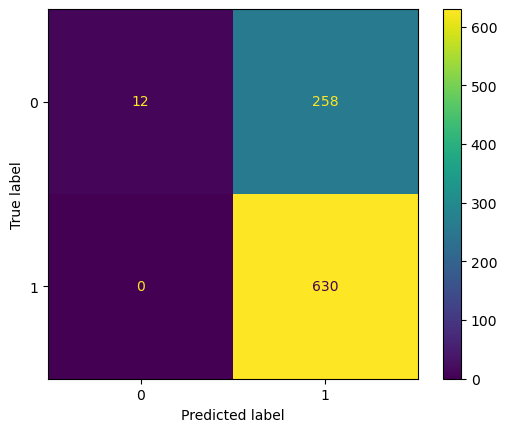

              precision    recall  f1-score   support

           0       1.00      0.04      0.09       270
           1       0.71      1.00      0.83       630

    accuracy                           0.71       900
   macro avg       0.85      0.52      0.46       900
weighted avg       0.80      0.71      0.61       900


Métricas de avaliação de teste:
[[ 1 29]
 [ 0 70]]


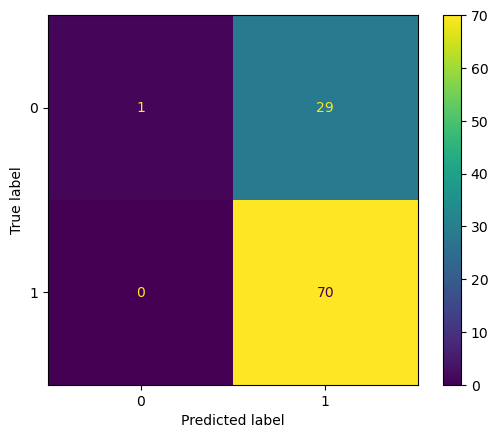

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        30
           1       0.71      1.00      0.83        70

    accuracy                           0.71       100
   macro avg       0.85      0.52      0.45       100
weighted avg       0.79      0.71      0.60       100



In [ ]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = publicidade_xgbc.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = publicidade_xgbc.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

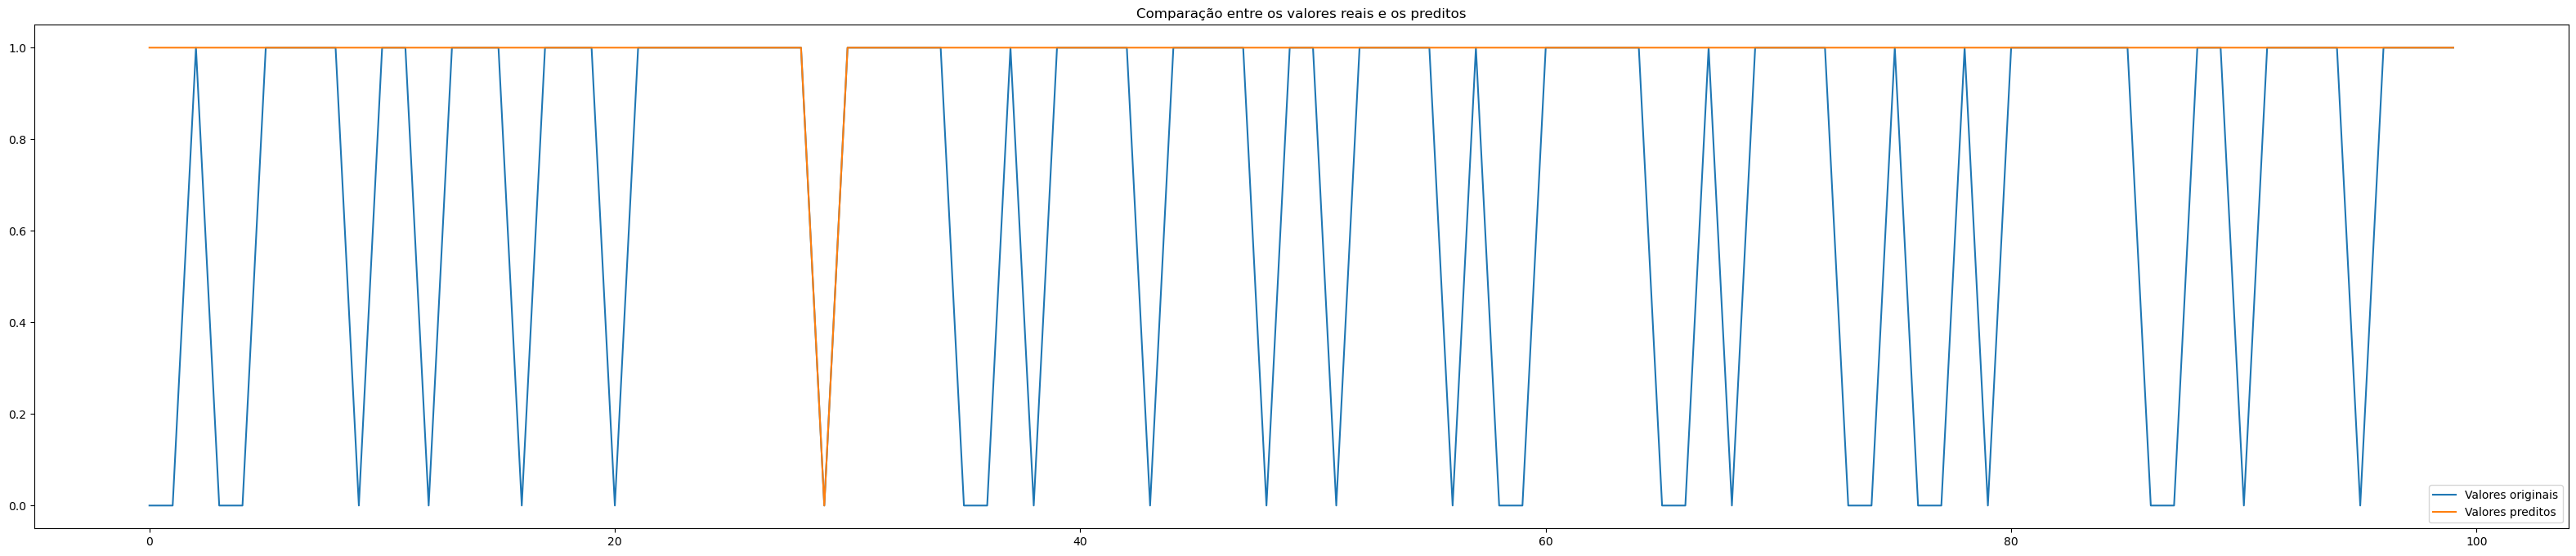

In [ ]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores originais")
plt.plot(x_ax, y_pred_test, label="Valores preditos")
plt.title("Comparação entre os valores reais e os preditos")
plt.legend()
plt.show();

In [ ]:
resultado_xgbr = df["Risk"].unique()
print(f"{resultado_xgbr}")

[1 0]


**Probabilidade de sair cada diagnóstico:**

In [ ]:
probas = publicidade_xgbc.predict_proba(X_test)
probas

array([[0.45620888, 0.5437911 ],
       [0.2903747 , 0.7096253 ],
       [0.44970095, 0.55029905],
       [0.30508357, 0.6949164 ],
       [0.45613796, 0.54386204],
       [0.23825926, 0.76174074],
       [0.47647798, 0.523522  ],
       [0.30502295, 0.69497705],
       [0.4561298 , 0.5438702 ],
       [0.2566865 , 0.7433135 ],
       [0.28422552, 0.7157745 ],
       [0.23812348, 0.7618765 ],
       [0.4114595 , 0.5885405 ],
       [0.2928406 , 0.7071594 ],
       [0.45620888, 0.5437911 ],
       [0.23825926, 0.76174074],
       [0.42948186, 0.57051814],
       [0.2564997 , 0.7435003 ],
       [0.2913785 , 0.7086215 ],
       [0.35809022, 0.6419098 ],
       [0.26456338, 0.7354366 ],
       [0.30508357, 0.6949164 ],
       [0.31207377, 0.68792623],
       [0.45613796, 0.54386204],
       [0.31313562, 0.6868644 ],
       [0.23736036, 0.76263964],
       [0.31424493, 0.6857551 ],
       [0.3711064 , 0.6288936 ],
       [0.25658798, 0.743412  ],
       [0.5155208 , 0.4844792 ],
       [0.

In [ ]:
tabela_publicidade_xgbc = pd.DataFrame()

In [ ]:
tabela_publicidade_xgbc["Amostra existente"] = y_test

In [ ]:
tabela_publicidade_xgbc["Predição"] = y_pred_test

In [ ]:
tabela_publicidade_xgbc

,Amostra existente,Predição
858,0,1
474,0,1
530,1,1
531,0,1
812,0,1
...,...,...
188,0,1
574,1,1
544,1,1
290,1,1


Salvando a tabela

In [ ]:
tabela_publicidade_xgbc.to_csv("11-publicidade_xgbc.csv")

Salvando o estimador...

In [ ]:
import pickle

In [ ]:
with open("publicidade_xgbc.pkl", "wb") as f:
    pickle.dump(publicidade_xgbc, f)

In [ ]:
with open("publicidade_xgbc.pkl", "rb") as f:
    
    publicidade_xgbc = pickle.load(f)

# **Otimização Bayesiana**



---



---



---



In [ ]:


def pipe_pre_german_credit(drop_not_features=["Risk"], col_target="Risk",
                             inputer_num_strategy="mean",
                             encoding="ordinal"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''

    X = df.drop(columns=drop_not_features)
    y = df[col_target]
    
    X_train_ob, X_test_ob, y_train_ob, y_test_ob = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train_ob.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
    
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])
    
    else:
        
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train_ob.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train_ob, X_test_ob, y_train_ob, y_test_ob, pre_processador

In [ ]:
X_train_ob, X_test_ob, y_train_ob, y_test_ob, pre_processador = pipe_pre_german_credit(drop_not_features=["Risk"], 
                                                                            col_target="Risk",
                                                                            inputer_num_strategy="mean",
                                                                            encoding="ordinal")

In [ ]:
!pip install hyperopt
from six.moves import collections_abc
from hyperopt import hp, tpe, fmin, Trials, space_eval

     ---------------------------------------- 1.6/1.6 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 200.5/200.5 kB 6.1 MB/s eta 0:00:00


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1b1b9e6fe20>
C:\Users\fabio\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\fabio\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Users\fabio\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)
C:\Users\fabio\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [ ]:
hps_space = {"n_estimators" : hp.choice("n_estimators",  range(100, 5000)),  
             "max_depth" : hp.choice("max_depth", [1, 2, 8, 10]),
             "learning_rate" : hp.choice("learning_rate", [0.001, 0.0001]),
             "colsample_bytree" : hp.choice("colsample_bytree", [0.2, 0.8]),
             "subsample" : hp.choice("subsample", [0.2, 0.8])}


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
def objective(hps_space):
    
    pipe = Pipeline([("pp", pre_processador),
                     ("xgbc_ob", XGBClassifier(**hps_space))])
    # =============================================

    splitter = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

    results = cross_validate(pipe,
                             X_train_ob, y_train_ob, 
                             cv=splitter,
                             scoring="f1_weighted",
                             n_jobs=-1)

    f1_mean = results["test_score"].mean()

    # como o valor vai ser minimizado, mas queremos MAXIMIZAR o f1, colocamos esse sinal negativo
    return -f1_mean

In [ ]:
ts = Trials()

best_hps = fmin(objective,
                space=hps_space,
                algo=tpe.suggest,
                trials=ts,
                max_evals=10)

100%|███████████████████████████████████████████████| 10/10 [02:20<00:00, 14.08s/trial, best loss: -0.7226884713005595]


In [ ]:
# pré-resposta da otimização
best_hps

{'colsample_bytree': 1,
 'learning_rate': 0,
 'max_depth': 3,
 'n_estimators': 2658,
 'subsample': 1}

In [ ]:
# a resposta final, vem com o space_eval
best_hps = space_eval(hps_space, best_hps)
best_hps

{'colsample_bytree': 0.8,
 'learning_rate': 0.001,
 'max_depth': 10,
 'n_estimators': 2758,
 'subsample': 0.8}

In [ ]:
XGBClassifier(**best_hps)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=2758, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=0.8,
              tree_method=None, validate_parameters=None, verbosity=None)

In [ ]:
pipe = Pipeline([("pp", pre_processador),
                 ("xgbc_ob", XGBClassifier(**best_hps, use_label_encoder=False))])

pipe.fit(X_train_ob, y_train_ob)

[14:01:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('transf_num',
                                                  Pipeline(steps=[('input_num',
                                                                   SimpleImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['Age', 'Job',
                                                   'Credit amount',
                                                   'Duration']),
                                                 ('transf_cat',
                                                  Pipeline(steps=[('input_cat',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                     


Métricas de avaliação de treino:
[[217  53]
 [  5 625]]


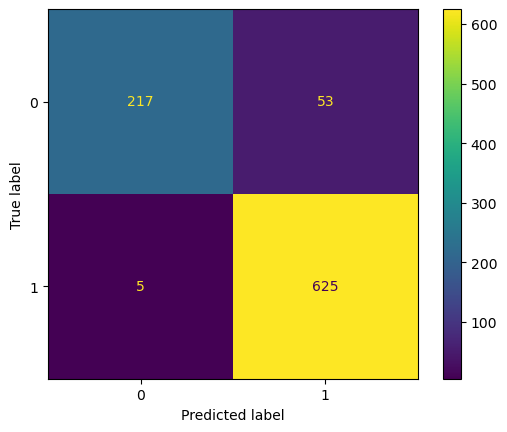

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       270
           1       0.92      0.99      0.96       630

    accuracy                           0.94       900
   macro avg       0.95      0.90      0.92       900
weighted avg       0.94      0.94      0.93       900


Métricas de avaliação de teste:
[[12 18]
 [ 6 64]]


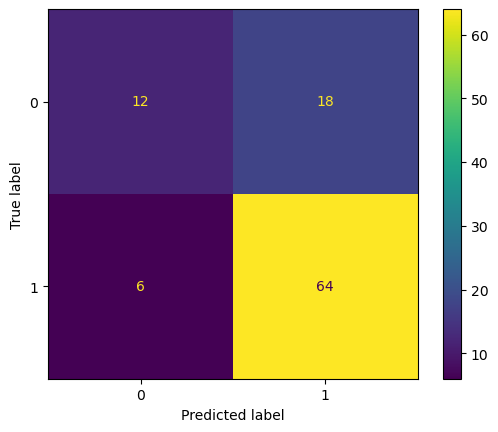

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        30
           1       0.78      0.91      0.84        70

    accuracy                           0.76       100
   macro avg       0.72      0.66      0.67       100
weighted avg       0.75      0.76      0.74       100



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_ob = pipe.predict(X_train_ob)

print(confusion_matrix(y_train_ob, y_pred_train_ob))

ConfusionMatrixDisplay.from_predictions(y_train_ob, y_pred_train_ob)
plt.show()

print(classification_report(y_train_ob, y_pred_train_ob))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_ob = pipe.predict(X_test_ob)

print(confusion_matrix(y_test_ob, y_pred_test_ob))

ConfusionMatrixDisplay.from_predictions(y_test_ob, y_pred_test_ob)
plt.show()

print(classification_report(y_test_ob, y_pred_test_ob))

**Já conseguimos equilibrar mais com otimização Bayesiana:**

In [ ]:
probas_y_pred_test_ob = pipe.predict_proba(X_test_ob)

In [ ]:
tabela_knn_ob = pd.DataFrame()

In [ ]:
y_test_ob.shape, y_pred_test_ob.shape

((100,), (100,))

In [ ]:
tabela_knn_ob["Amostra existente"] = y_test_ob

In [ ]:
tabela_knn_ob["Predição"] = y_pred_test_ob

In [ ]:
tabela_knn_ob

,Amostra existente,Predição
440,1,1
561,0,1
220,1,0
696,1,1
810,1,1
...,...,...
386,1,1
788,0,0
654,1,1
705,1,1


Salvando a tabela

In [ ]:
tabela_knn_ob.to_csv("15-german_credit_xgbc_ob.csv")

Salvando o estimador...

In [ ]:
import pickle

In [ ]:
with open("tabela_xgbc_ob.pkl", "wb") as f:
    pickle.dump(tabela_knn_ob, f)

In [ ]:
with open("tabela_xgbc_ob.pkl", "rb") as f:
    
    tabela_xgbc_ob = pickle.load(f)



---



---



---



#**INTERPRETABILIDADE DO MODELO GLOBALMENTE**

In [ ]:
df_mg = pd.read_csv("C://Users//fabio//OneDrive//Documentos//GitHub//Machine-Learning---Rede-Neural//15-German Credit//german_credit_data.csv")
df_mg

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
df_mg.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
df_mg['Risk'] = df_mg['Risk'].map({'bad':0, 'good':1})

Vamos tratar os valores nulos:

In [ ]:
si = SimpleImputer(strategy="constant", fill_value="unknown")
si.fit(df_mg[["Saving accounts"]])
       
df_mg["Saving accounts"] = si.transform(df_mg[["Saving accounts"]])

**Transformando as Features categóricas em numéricas - OneHotEnconder - Features de dados binários:**

In [ ]:
lista_oe = ["Sex"]

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df_mg[[i]])

  df_mg[i] = oe.transform(df_mg[[i]])

**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [ ]:
lista_oe = ["Housing", "Saving accounts", "Checking account", "Purpose"]

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df_mg[[i]])

  df_mg[i] = oe.transform(df_mg[[i]])

**Vamos escalonar todas as Features, pois a amplitude entre os dados está muito grande, isso pode causar um viés no resultado final:**

In [ ]:
df_mg.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
ssc = StandardScaler()

ssc.fit(df_mg[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']])
h= ssc.transform(df_mg[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']])
df_mg[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']] = h

**Separar em features e target...**

In [ ]:
X = df_mg.drop(columns=["Risk"])
y = df_mg["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [ ]:
knn_shap = KNeighborsClassifier()

In [ ]:
y_train = np.nan_to_num(y_train)
X_train = np.nan_to_num(X_train)

In [ ]:
knn_shap.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
!pip install shap
import shap

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1900b676640>
C:\Users\fabio\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\fabio\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)
C:\Users\fabio\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)


In [ ]:
explainer = shap.KernelExplainer(knn_shap.predict_proba, X_train)

Using 800 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_vals = explainer.shap_values(X_train)

  0%|          | 0/800 [00:00<?, ?it/s]

In [ ]:
risk = df_mg["Risk"].unique()
print(f"{risk}")

[1 0]


**Features que mais impactaram na escolha das espécies durante a geração do predict:**

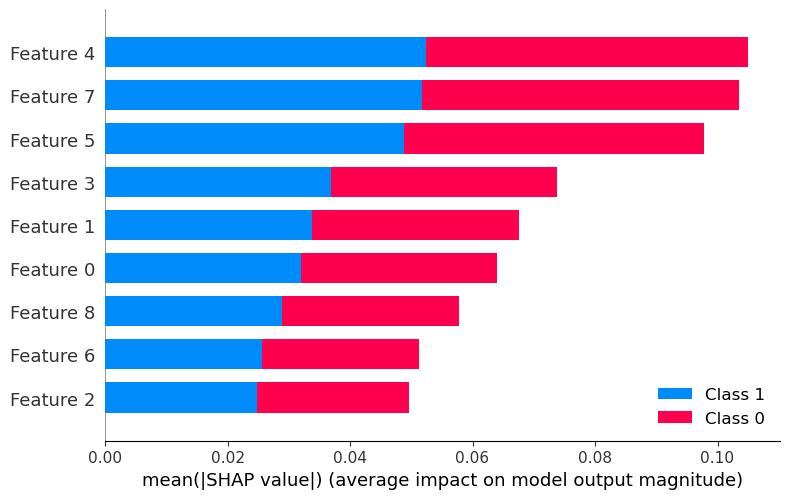

In [ ]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")

In [ ]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.0 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 5.0 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 177.

unclosed socket <zmq.Socket(zmq.PUSH) at 0x1b1bafaf6a0>
unclosed file <_io.BufferedWriter name=5>
unclosed file <_io.BufferedReader name=7>
unclosed file <_io.BufferedReader name=8>


#**KerasClassifier**

In [ ]:
!pip install scikeras

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import backend as k
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [3]:
df_kr = pd.read_csv("german_credit_data.csv")
df_kr

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
df_kr.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df_kr['Risk'] = df_kr['Risk'].map({'bad':0, 'good':1})

**Tratando os valores nulos**

In [9]:
si = SimpleImputer(strategy="constant", fill_value="unknown")
si.fit(df_kr[["Saving accounts"]])
       
df_kr["Saving accounts"] = si.transform(df_kr[["Saving accounts"]])

**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [10]:
lista_oe = ["Sex"]

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df_kr[[i]])

  df_kr[i] = oe.transform(df_kr[[i]])

**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [11]:
lista_oe = ["Housing", "Saving accounts", "Checking account", "Purpose"]

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df_kr[[i]])

  df_kr[i] = oe.transform(df_kr[[i]])

In [12]:
ssc = StandardScaler()

ssc.fit(df_kr[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']])
h= ssc.transform(df_kr[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']])
df_kr[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']] = h

In [ ]:
y_train = np.nan_to_num(y_train)
X_train = np.nan_to_num(X_train)

**Verificando se há dados nulos:**

In [13]:
df_kr.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [14]:
df_kr.dtypes

Age                 float64
Sex                 float64
Job                 float64
Housing             float64
Saving accounts     float64
Checking account    float64
Credit amount       float64
Duration            float64
Purpose             float64
Risk                  int64
dtype: object

In [16]:
df_kr.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,2.766456,0.670280,0.146949,-0.133710,1.833169,-1.254566,-0.745131,-1.236478,1.073263,1
1,-1.191404,-1.491914,0.146949,-0.133710,-0.699707,-0.459026,0.949817,2.248194,1.073263,0
2,1.183312,0.670280,-1.383771,-0.133710,-0.699707,1.132053,-0.416562,-0.738668,0.061705,1
3,0.831502,0.670280,0.146949,-2.016956,-0.699707,-1.254566,1.634247,1.750384,0.567484,1
4,1.535122,0.670280,0.146949,-2.016956,-0.699707,-1.254566,0.566664,0.256953,-0.949853,0


**Dividindo os dados em target e features e aplicando a divisão de dados de treino e dados de teste.**

**Construino a rede...**

In [20]:
X = df_kr.drop(columns=["Risk"])
y = df_kr["Risk"]

#====================================================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def criarRede(optimizer='rmsprop', init='glorot_uniform'):
    k.clear_session()
    rn = Sequential([
               #1ª camada oculta
               tf.keras.layers.Dense(units=6, activation = "relu", kernel_initializer = "random_uniform", input_dim=9), # input_dim = nº de colunas
               tf.keras.layers.Dropout(0.2),
               #2ª camada oculta
               tf.keras.layers.Dense(units=6, activation = "relu", kernel_initializer = "random_uniform"),
               tf.keras.layers.Dropout(0.2), #Dropout = % de colunas zeradas para não dar overfitting! Recomendável entre 0.2 e 0.3
               #Camada de saída
               tf.keras.layers.Dense(units= 1, activation = 'sigmoid')])
    

    rn.compile(optimizer = optimizer, loss = "binary_crossentropy", metrics = ['binary_accuracy'])


    return rn

In [ ]:
print(X_train.shape, y_train.shape)

(700, 9) (700,)


In [19]:
X_train.shap

(700, 9)

In [ ]:
rn = KerasClassifier(model=criarRede)
#============================================================================================
optimizers = ['adam']
init = ['uniform']
epochs = [1000]
batches = [20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, model__init=init)

#================================================================================
grid_search = GridSearchCV(estimator=rn,
                           param_grid=param_grid,
                           scoring="accuracy",
                           cv=10)

grid_search = grid_search.fit(X_train, y_train)

**Salvar o modelo:**

In [22]:
import pickle

In [23]:
with open("grid_search.pkl", "wb") as f:
    pickle.dump(grid_search, f)

In [ ]:
with open("grid_search.pkl", "rb") as f:
    
    grid_search = pickle.load(f)

In [24]:
grid_search.best_params_

{'batch_size': 20,
 'epochs': 1000,
 'model__init': 'uniform',
 'optimizer': 'adam'}

**Score:**

In [25]:
print(f"O melhor score foi de {(grid_search.best_score_)*100:.2f}%")

O melhor score foi de 71.14%


Superamos o XGBoost e Otimização Bayesiana


Métricas de avaliação de treino:
35/35 [==============================] - 0s 1ms/step
[[ 85 125]
 [ 39 451]]


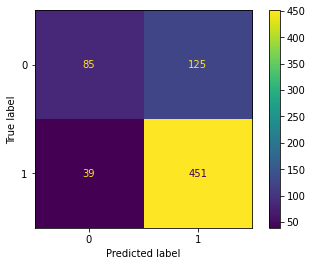

              precision    recall  f1-score   support

           0       0.69      0.40      0.51       210
           1       0.78      0.92      0.85       490

    accuracy                           0.77       700
   macro avg       0.73      0.66      0.68       700
weighted avg       0.75      0.77      0.75       700


Métricas de avaliação de teste:
15/15 [==============================] - 0s 1ms/step
[[ 29  61]
 [ 14 196]]


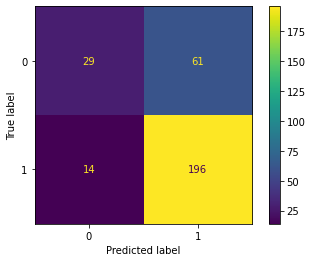

              precision    recall  f1-score   support

           0       0.67      0.32      0.44        90
           1       0.76      0.93      0.84       210

    accuracy                           0.75       300
   macro avg       0.72      0.63      0.64       300
weighted avg       0.74      0.75      0.72       300



In [26]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_search.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_search.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [27]:
tabela = pd.DataFrame()
tabela["y real"] = y_test
tabela["y preditivo"] = y_pred_test
tabela

,y real,y preditivo
80,0,1
157,1,1
65,1,1
489,1,1
804,1,1
...,...,...
19,1,1
208,1,0
627,0,1
357,0,1


Salvando a tabela...

In [28]:
tabela.to_csv("tabela_comparação.csv")

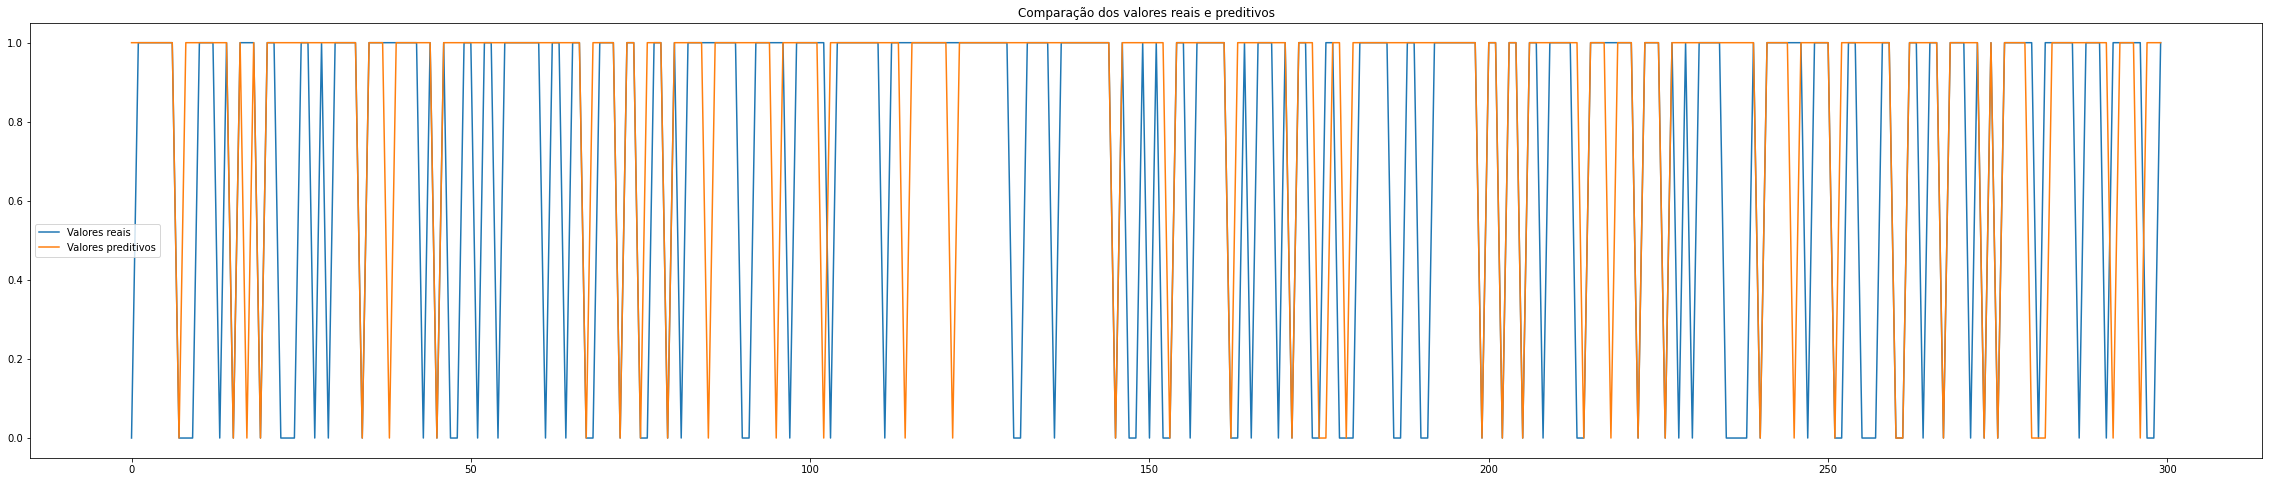

In [29]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores reais")
plt.plot(x_ax, y_pred_test, label="Valores preditivos")
plt.title("Comparação dos valores reais e preditivos")
plt.legend()
plt.show();